### DS 5110 Assignment 1 Report
#### Eric Tria
#### emt4wf

### Report

After setting up Hadoop and Spark on two virtual machines, I was able to complete the following tasks for the assignment:
- Sorting
- PageRank without partition
- PageRank with Partition
- PageRank with Partition and 1 killed worker

To show the results of the tasks, the code below reads in the files from HDFS:

In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.3.1-bin-hadoop3')

In [2]:
findspark.find()

'/home/ubuntu/spark-3.3.1-bin-hadoop3'

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

In [4]:
spark = SparkSession.builder\
    .appName('Spark Assignment 1 Report')\
    .master('spark://172.31.82.177:7077')\
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/02/21 23:05:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Problem 2: Sorting

The command I used on the terminal was:

`~/spark-3.3.1-bin-hadoop3/bin/spark-submit sort_file.py hdfs://172.31.82.177:9000/export.csv hdfs://172.31.82.177:9000/export_sorted.csv`

Runtime: 24 seconds

It reads in `sort_file.py` from HDFS and outputs the resulting csv file to `export_sorted.csv` on HDFS. A snapshot of the resulting file is shown below:

In [5]:
# Problem 2

p2_df = spark.read.load(
    'hdfs://172.31.82.177:9000/export_sorted.csv',
    format = 'csv',
    inferSchema = 'true',
    sep = ',',
    header = 'true'
)

In [6]:
p2_df.show(20)

+-------------+---------+----+----+--------------------+---------+--------------------+--------+---------------+--------+------+---------+-------+----+-------------+
|battery_level|c02_level|cca2|cca3|                  cn|device_id|         device_name|humidity|             ip|latitude|   lcd|longitude|  scale|temp|    timestamp|
+-------------+---------+----+----+--------------------+---------+--------------------+--------+---------------+--------+------+---------+-------+----+-------------+
|            5|     1217|  AE| ARE|United Arab Emirates|      501|device-mac-501e4O...|      48|  213.42.16.154|    24.0|yellow|     54.0|Celsius|  16|1458444054343|
|            0|      915|  AR| ARG|           Argentina|      227|meter-gauge-2273p...|      34|  200.71.230.81|   -34.6| green|   -58.38|Celsius|  15|1458444054251|
|            1|     1189|  AR| ARG|           Argentina|      319|meter-gauge-319Y3...|      54| 200.71.236.145|   -34.6|yellow|   -58.38|Celsius|  25|1458444054287|
|   

The resulting file is ordered by the *cca2* and *timestamp* columns.

### Problem 3: PageRank

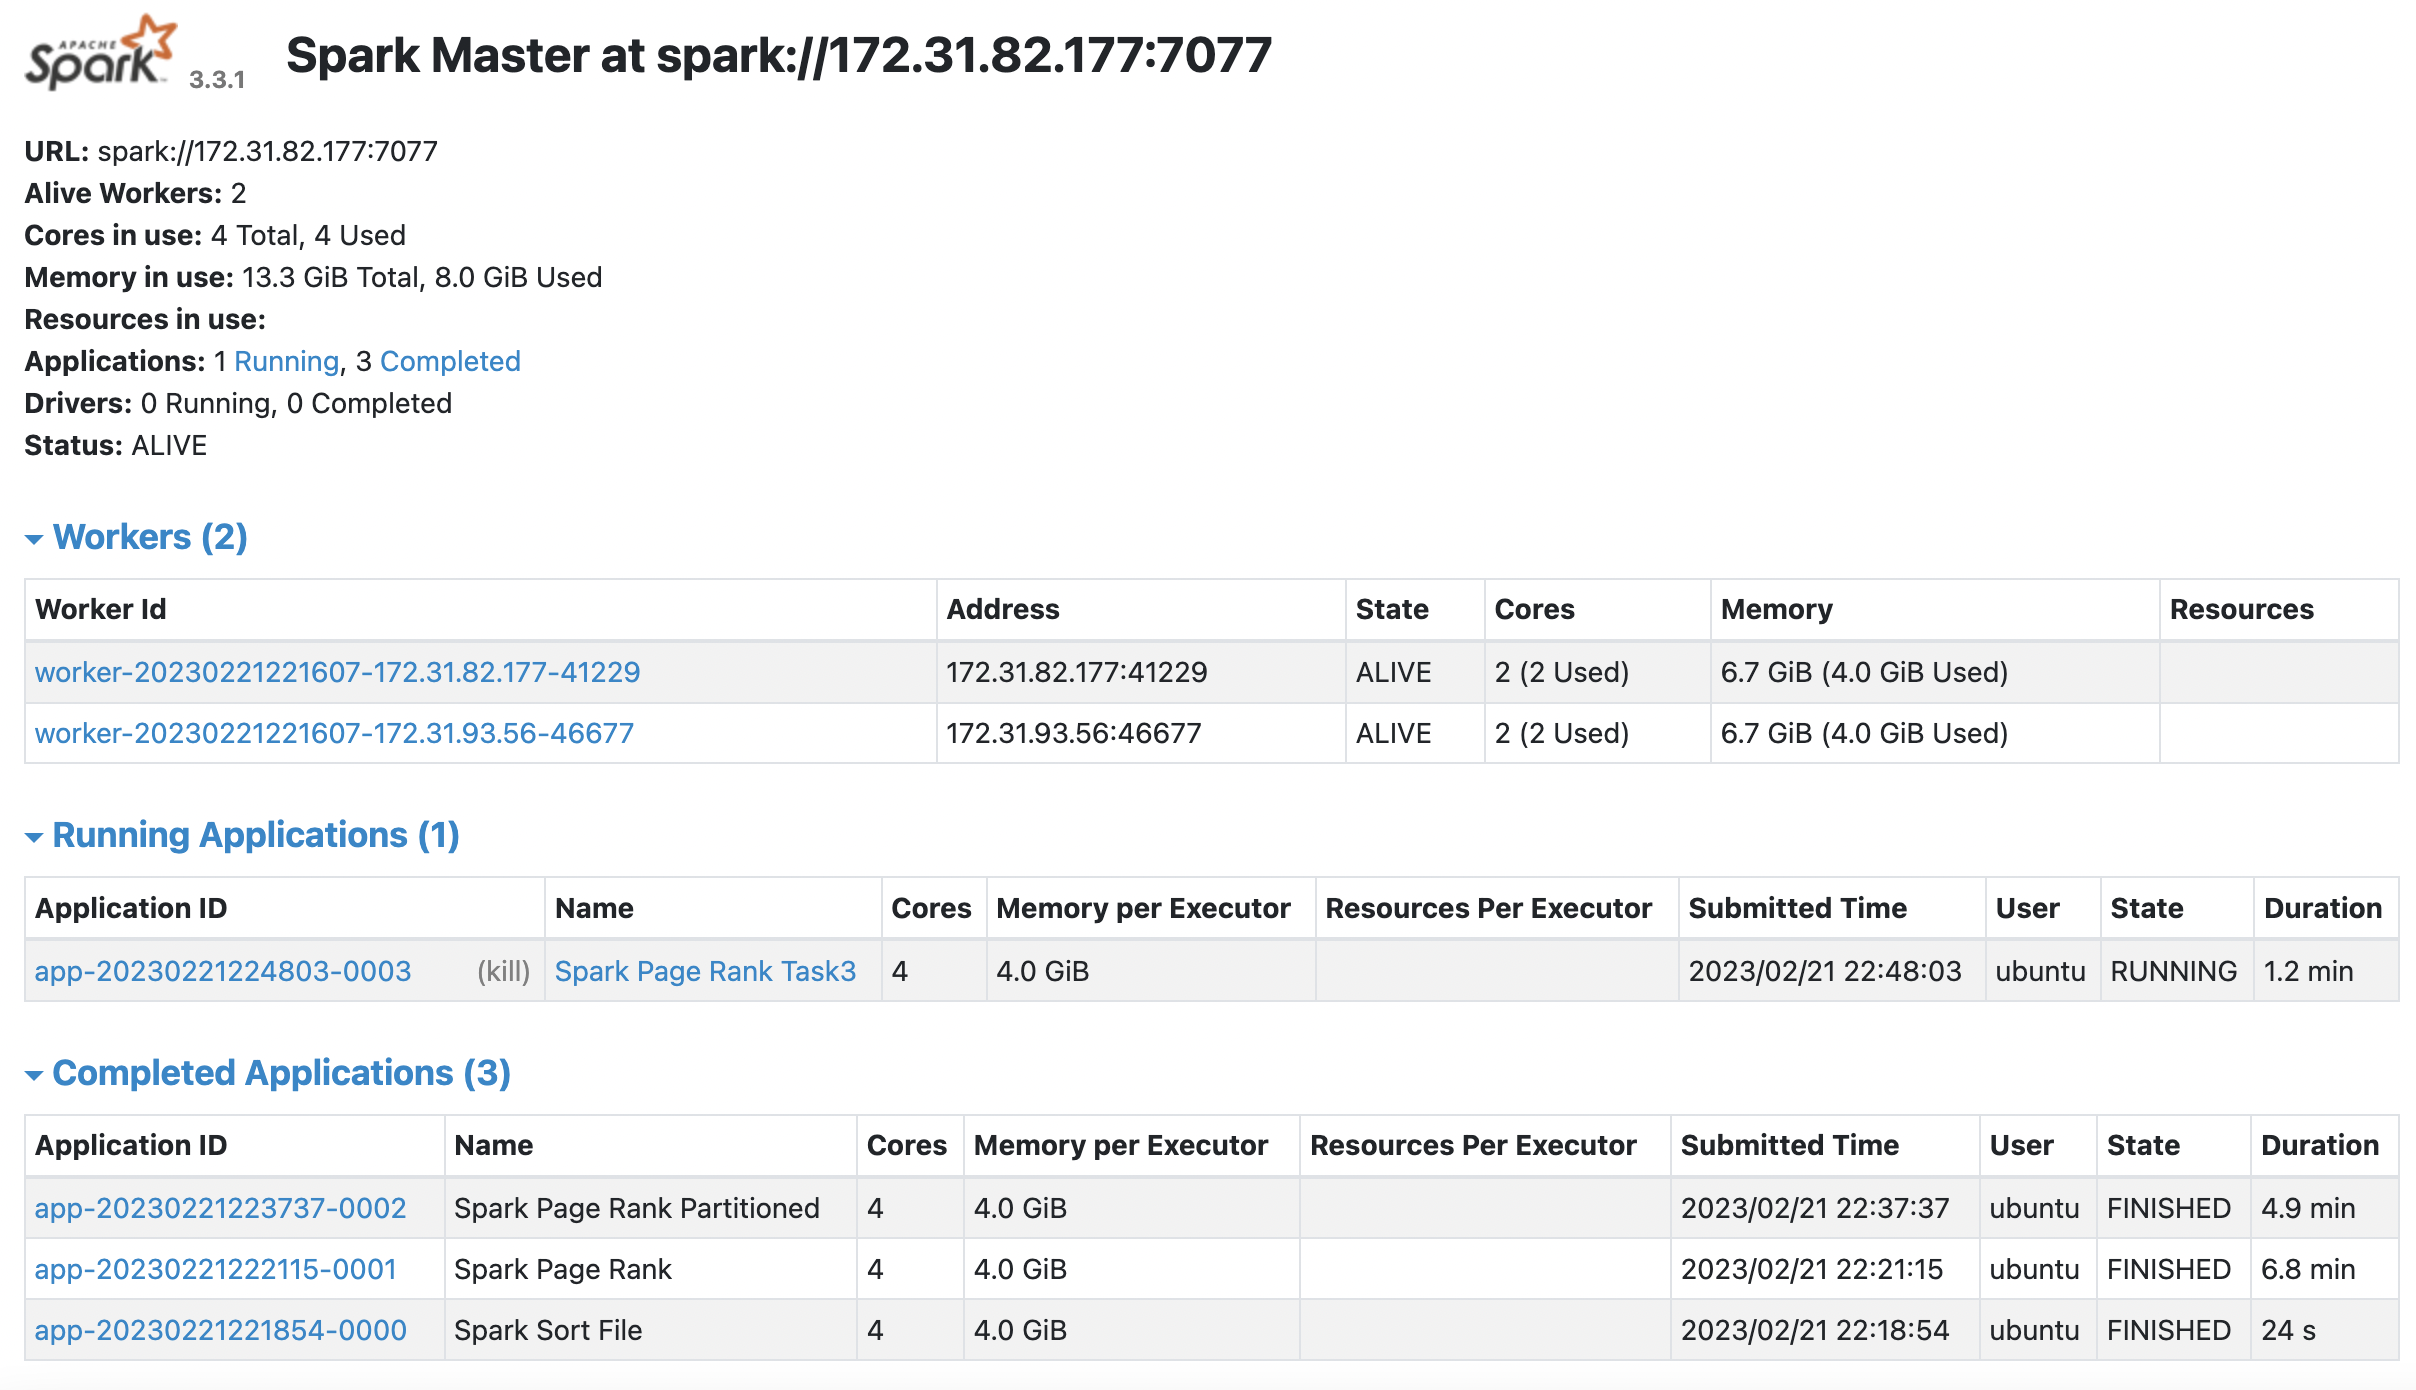

In [1]:
from IPython.display import Image

Image(filename='dash1.png')

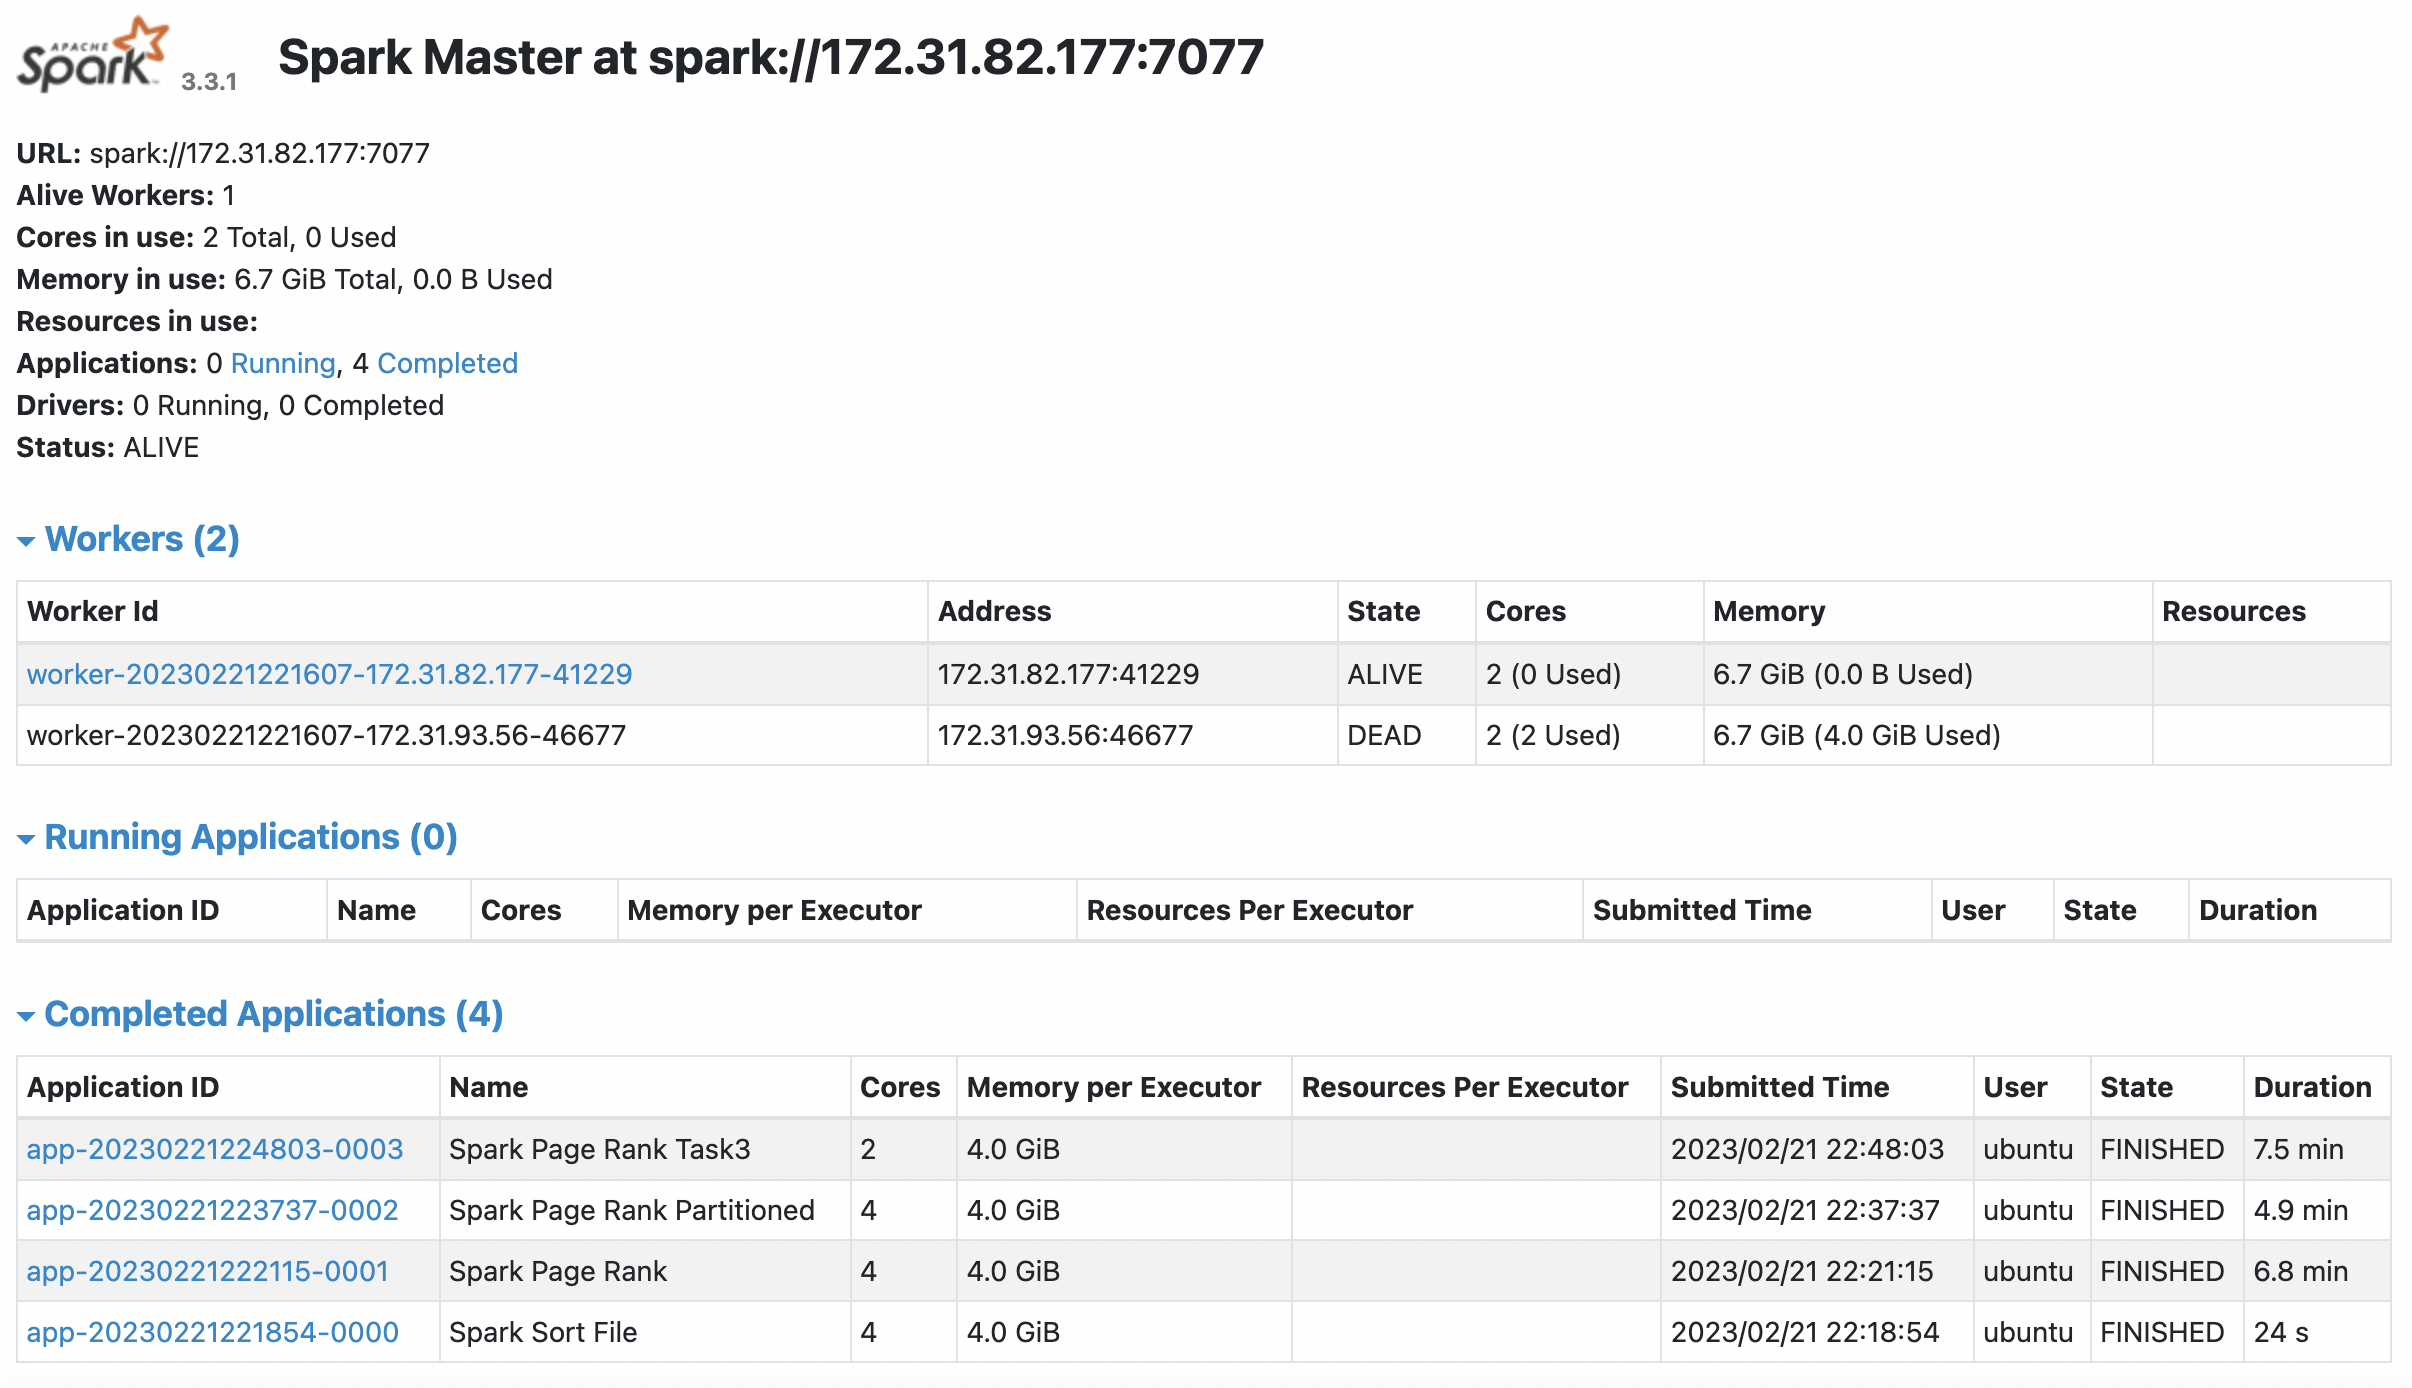

In [2]:
Image(filename='dash2.png')

#### Problem 3 Task 1: Non-Partitioned

The command I used was:

`~/spark-3.3.1-bin-hadoop3/bin/spark-submit page_rank_spark.py hdfs://172.31.82.177:9000/web-BerkStan.txt hdfs://172.31.82.177:9000/page_rank.csv`

Runtime: 6.8 minutes

The non-partitioned version of the PageRank algorithm completed in about 7 minutes. This was with workers from both VMs running.

In [7]:
# Problem 3 Task 1

p3_t1_df = spark.read.load(
    'hdfs://172.31.82.177:9000/page_rank.csv',
    format = 'csv',
    inferSchema = 'true',
    sep = ',',
    header = 'true'
)

In [8]:
p3_t1_df.sort(col('rank').desc()).show(20)

+------+------------------+
|  link|              rank|
+------+------------------+
|272919| 6531.324623752433|
|438238| 4335.323158564438|
|571448|2383.8976074118855|
|601656| 2195.394075596729|
|316792|1855.6908757901438|
|319209| 1632.819368497569|
|184094|1532.2842374483303|
|571447|1492.9301630938774|
|401873|1436.1600933469247|
| 66244|1261.5783958673358|
| 68949|1260.7919421349147|
|284306|1257.2475650644838|
| 68948|1251.1723536459242|
| 77284| 1235.298540597627|
| 95552| 1235.298540597627|
| 86239| 1235.298540597627|
| 66909| 1235.298540597627|
| 96070| 1235.298540597627|
| 86238| 1235.298540597627|
| 95551| 1235.298540597627|
+------+------------------+
only showing top 20 rows



#### Problem 3 Task 2: Partitioned
The command I used was:

`~/spark-3.3.1-bin-hadoop3/bin/spark-submit page_rank_partitioned.py hdfs://172.31.82.177:9000/web-BerkStan.txt hdfs://172.31.82.177:9000/page_rank_partitioned.csv 20`

Runtime: 4.9 minutes

The partitioned version of the PageRank algorithm was faster and completed in about 5 minutes. I used 20 partitions and it was able to improve the runtime.

In [9]:
# Problem 3 Task 2

p3_t2_df = spark.read.load(
    'hdfs://172.31.82.177:9000/page_rank_partitioned.csv',
    format = 'csv',
    inferSchema = 'true',
    sep = ',',
    header = 'true'
)

In [11]:
p3_t2_df.sort(col('rank').desc()).show(20)

+------+------------------+
|  link|              rank|
+------+------------------+
|272919| 6531.324623752434|
|438238| 4335.323158564433|
|571448|2383.8976074118877|
|601656|2195.3940755967283|
|316792|1855.6908757901433|
|319209|1632.8193684975697|
|184094|1532.2842374483228|
|571447|1492.9301630938778|
|401873|  1436.16009334692|
| 66244|1261.5783958673333|
| 68949|1260.7919421349122|
|284306|1257.2475650644838|
| 68948|1251.1723536459224|
| 86238|1235.2985405976249|
| 96070|1235.2985405976249|
| 86237|1235.2985405976249|
| 95551|1235.2985405976247|
| 68947|1235.2985405976247|
| 66909|1235.2985405976244|
| 95552|1235.2985405976244|
+------+------------------+
only showing top 20 rows



#### Problem 3 Task 3: Partitioned with killed worker
The command I used was:

`~/spark-3.3.1-bin-hadoop3/bin/spark-submit page_rank_partitioned.py hdfs://172.31.82.177:9000/web-BerkStan.txt hdfs://172.31.82.177:9000/page_rank_partitioned.csv 20`

And after 2 minutes in vm2 I killed the Spark worker using:
`
sudo sh -c "sync; echo 3 > /proc/sys/vm/drop_caches
kill -9 <Worker_PID>
`

Runtime: 7.5 minutes

With the worker in vm2 killed midway, the partitioned version of the PageRank algorithm took longer to finish even with the same number of partitions. This is likely due to the processes in the killed worker having to be rerun in the remaining worker. This caused the runtime to extend longer.

In [12]:
# Problem 3 Task 3

p3_t3_df = spark.read.load(
    'hdfs://172.31.82.177:9000/page_rank_task3.csv',
    format = 'csv',
    inferSchema = 'true',
    sep = ',',
    header = 'true'
)

In [13]:
p3_t3_df.sort(col('rank').desc()).show(20)

+------+------------------+
|  link|              rank|
+------+------------------+
|272919|6531.3246237524345|
|438238|4335.3231585644335|
|571448|2383.8976074118873|
|601656|  2195.39407559673|
|316792|1855.6908757901433|
|319209|1632.8193684975693|
|184094|1532.2842374483212|
|571447|1492.9301630938778|
|401873|1436.1600933469201|
| 66244|1261.5783958673337|
| 68949| 1260.791942134913|
|284306| 1257.247565064484|
| 68948|1251.1723536459226|
| 86238|1235.2985405976253|
| 96070|1235.2985405976253|
| 86237| 1235.298540597625|
| 68946| 1235.298540597625|
| 68947| 1235.298540597625|
| 66909| 1235.298540597625|
| 95551|1235.2985405976249|
+------+------------------+
only showing top 20 rows



### Conclusion

Overall, I was able to see how HDFS and Spark are very useful tools for performing intensive operations on large datasets. It is good to have multiple workers working together in order to make the processed more efficient. It is also good practice to partition the data when performing operations on dataframes and RDDs as this also makes the operations more efficient. This assignment provided a demonstraton on how distributed data systems can be very useful in real-life scenarios.

### References

The following were used as references for the code in this assignment:
- The pr_skeleton.py file provided by Professor Cheng
- The [Apache Implementation of PageRank](https://github.com/apache/spark/blob/master/examples/src/main/python/pagerank.py)
- Taylan Kabbani's [Medium article](https://medium.com/swlh/pagerank-on-mapreduce-55bcb76d1c99) on implementing MapReduce
- Ashish Shenoy's example [PageRank implementation](https://github.com/ashishvshenoy/pagerank-spark)